# **Telco Customer Churn**

**Description**
<br/>This project aims to gain valuable insights from the dataset of customers of Telco, comprising information such as churn label (whether customer churned or not), churn reason (reason why the customer churn), and many other factors such as demographic, revenue earned from the customer and the service provided to the customer. Through these insights, company can adjust their service to retain its customer. Also, this project conducts a ML projection to predict potential churn customer.

**Importing the dataset from Kaggle**

In [ ]:
import pandas as pd
import numpy as np
import math
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# **Data Loading and Cleaning**

**Importing the dataset from Kaggle**

In [ ]:
!kaggle datasets download rhonarosecortez/telco-customer-churn
!unzip telco-customer-churn.zip

Dataset URL: https://www.kaggle.com/datasets/rhonarosecortez/telco-customer-churn
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/504k [00:00<?, ?B/s]
100% 504k/504k [00:00<00:00, 60.5MB/s]
Archive:  telco-customer-churn.zip
  inflating: TelcoCustomerChurn.csv  


In [ ]:
df = pd.read_csv('TelcoCustomerChurn.csv')
df.head()

,CustomerID,Gender,Age,Under30,SeniorCitizen,Married,Dependents,NumberofDependents,Country,State,City,ZipCode,Latitude,Longitude,Population,Quarter,ReferredaFriend,Number_of_Referrals,TenureinMonths,Offer,PhoneService,AvgMonthlyLongDistanceCharges,MultipleLines,InternetService,InternetType,AvgMonthlyGBDownload,OnlineSecurity,OnlineBackup,DeviceProtectionPlan,PremiumTechSupport,StreamingTV,StreamingMovies,StreamingMusic,UnlimitedData,Contract,PaperlessBilling,PaymentMethod,MonthlyCharge,TotalCharges,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,SatisfactionScore,CustomerStatus,ChurnLabel,ChurnScore,CLTV,ChurnCategory,ChurnReason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,34.108833,-118.229715,47534,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,90303,33.936291,-118.332639,27778,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,Whittier,90602,33.972119,-118.020188,26265,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Under30', 'SeniorCitizen', 'Married',
       'Dependents', 'NumberofDependents', 'Country', 'State', 'City',
       'ZipCode', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'ReferredaFriend', 'Number_of_Referrals', 'TenureinMonths', 'Offer',
       'PhoneService', 'AvgMonthlyLongDistanceCharges', 'MultipleLines',
       'InternetService', 'InternetType', 'AvgMonthlyGBDownload',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtectionPlan',
       'PremiumTechSupport', 'StreamingTV', 'StreamingMovies',
       'StreamingMusic', 'UnlimitedData', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharge', 'TotalCharges', 'TotalRefunds',
       'TotalExtraDataCharges', 'TotalLongDistanceCharges', 'TotalRevenue',
       'SatisfactionScore', 'CustomerStatus', 'ChurnLabel', 'ChurnScore',
       'CLTV', 'ChurnCategory', 'ChurnReason'],
      dtype='object')

Notable columns:
* CustomerID
* Gender
* Age
* Number of Dependents
* Number of Referrals
* Tenure in Months
* Offer
* Customer plan's specification: 'InternetService', 'InternetType', 'AvgMonthlyGBDownload',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtectionPlan',
       'PremiumTechSupport', 'StreamingTV', 'StreamingMovies',
       'StreamingMusic', 'UnlimitedData'
* Contract
* Payment method:
      'PaperlessBilling','PaymentMethod'
* Charge & Revenue gained from customers:
      'MonthlyCharge', 'TotalCharges', 'TotalRefunds', 'TotalExtraDataCharges', 'TotalLongDistanceCharges', 'TotalRevenue'
* Satisfaction Score
* Churn related:
      'CustomerStatus', 'ChurnLabel', 'ChurnScore','CLTV', 'ChurnCategory', 'ChurnReason'
* CLTV


**Checking data type of the columns, as well as null duplicated values**

In [ ]:
print(df.info())
print('----------------------------------------------------------')
print(df.isnull().sum())
print('----------------------------------------------------------')
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustomerID                     7043 non-null   object 
 1   Gender                         7043 non-null   object 
 2   Age                            7043 non-null   int64  
 3   Under30                        7043 non-null   object 
 4   SeniorCitizen                  7043 non-null   object 
 5   Married                        7043 non-null   object 
 6   Dependents                     7043 non-null   object 
 7   NumberofDependents             7043 non-null   int64  
 8   Country                        7043 non-null   object 
 9   State                          7043 non-null   object 
 10  City                           7043 non-null   object 
 11  ZipCode                        7043 non-null   int64  
 12  Latitude                       7043 non-null   f

**Handling null values**

In [ ]:
col_w_null = ['Offer', 'InternetType', 'ChurnCategory', 'ChurnReason']

In [ ]:
for col in col_w_null:
  print(f'{col}: {df[col].unique()}')

Offer: [nan 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']
InternetType: ['DSL' 'Fiber Optic' 'Cable' nan]
ChurnCategory: ['Competitor' 'Dissatisfaction' 'Price' 'Other' 'Attitude' nan]
ChurnReason: ['Competitor offered more data' 'Competitor made better offer'
 'Limited range of services' 'Extra data charges'
 'Competitor had better devices' "Don't know" 'Service dissatisfaction'
 'Lack of affordable download/upload speed' 'Product dissatisfaction'
 'Long distance charges' 'Poor expertise of online support'
 'Attitude of support person' 'Network reliability'
 'Competitor offered higher download speeds' 'Moved' 'Price too high'
 'Attitude of service provider' 'Poor expertise of phone support'
 'Deceased' nan 'Lack of self-service on Website']


In [ ]:
print(df['InternetService'].unique())
print(df['ChurnLabel'].unique())

['Yes' 'No']
['Yes' 'No']


It seems that the null values in 2 columns 'InternetType' and 'ChurnCategory' (as well as 'ChurnReason') are aligned with 'No' rows in 2 columns 'InternetService' and 'ChurnLabel', respectively.

Check if whether there is null values in Internet Type for 'Yes' value InternetService; and whether there is null values in ChurnCategory, ChurnReason for 'Yes' value ChurnLabel

In [ ]:
#Check for null values in Internet Type for 'Yes' in Internet Service
print('null values for Yes value Internet Service: ',
      df[df['InternetService'] == 'Yes']['InternetType'].isnull().sum())
#Check for null values in Churn Category, Churn Reason for 'Yes' value in Churn Label
print('null values for Yes value Churn Label:\n',
      df[df['ChurnLabel'] == 'Yes'][['ChurnCategory', 'ChurnReason']].isnull().sum())

null values for Yes value Internet Service:  0
null values for Yes value Churn Label:
 ChurnCategory    0
ChurnReason      0
dtype: int64


**Replace Null values**

In [ ]:
df.fillna('None', inplace = True)
print(df.isnull().sum())

CustomerID                       0
Gender                           0
Age                              0
Under30                          0
SeniorCitizen                    0
Married                          0
Dependents                       0
NumberofDependents               0
Country                          0
State                            0
City                             0
ZipCode                          0
Latitude                         0
Longitude                        0
Population                       0
Quarter                          0
ReferredaFriend                  0
Number_of_Referrals              0
TenureinMonths                   0
Offer                            0
PhoneService                     0
AvgMonthlyLongDistanceCharges    0
MultipleLines                    0
InternetService                  0
InternetType                     0
AvgMonthlyGBDownload             0
OnlineSecurity                   0
OnlineBackup                     0
DeviceProtectionPlan

**Dropping unecessary columns**
As there's already an 'Age' column --> drop 'Under30' <br/>
There's already a 'NumberofDependents' column --> drop 'Dependents' <br/>
Drop 'Country' and 'State' and 'Quarter', as these columns have 1 unique value <br/>
Drop 'ZipCode'


In [ ]:
df = df.drop(columns = ['Under30', 'Dependents','Country','State', 'Quarter', 'ZipCode'])
df.columns

Index(['CustomerID', 'Gender', 'Age', 'SeniorCitizen', 'Married',
       'NumberofDependents', 'City', 'Latitude', 'Longitude', 'Population',
       'ReferredaFriend', 'Number_of_Referrals', 'TenureinMonths', 'Offer',
       'PhoneService', 'AvgMonthlyLongDistanceCharges', 'MultipleLines',
       'InternetService', 'InternetType', 'AvgMonthlyGBDownload',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtectionPlan',
       'PremiumTechSupport', 'StreamingTV', 'StreamingMovies',
       'StreamingMusic', 'UnlimitedData', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharge', 'TotalCharges', 'TotalRefunds',
       'TotalExtraDataCharges', 'TotalLongDistanceCharges', 'TotalRevenue',
       'SatisfactionScore', 'CustomerStatus', 'ChurnLabel', 'ChurnScore',
       'CLTV', 'ChurnCategory', 'ChurnReason'],
      dtype='object')

**EDA**

**Checking columns related to revenue**

In [ ]:
df[['TenureinMonths','MonthlyCharge', 'TotalCharges', 'TotalRefunds','TotalExtraDataCharges', 'AvgMonthlyLongDistanceCharges','TotalLongDistanceCharges', 'TotalRevenue']]

,TenureinMonths,MonthlyCharge,TotalCharges,TotalRefunds,TotalExtraDataCharges,AvgMonthlyLongDistanceCharges,TotalLongDistanceCharges,TotalRevenue
0,1,39.65,39.65,0.00,20,0.00,0.00,59.65
1,8,80.65,633.30,0.00,0,48.85,390.80,1024.10
2,18,95.45,1752.55,45.61,0,11.33,203.94,1910.88
3,25,98.50,2514.50,13.43,0,19.76,494.00,2995.07
4,37,76.50,2868.15,0.00,0,6.33,234.21,3102.36
...,...,...,...,...,...,...,...,...
7038,72,21.15,1419.40,19.31,0,22.77,1639.44,3039.53
7039,24,84.80,1990.50,48.23,0,36.05,865.20,2807.47
7040,72,103.20,7362.90,45.38,0,29.66,2135.52,9453.04
7041,11,29.60,346.45,27.24,0,0.00,0.00,319.21


We can see that:
* Total Charges ~ Tenure * Monthly Charge
* Total Long Distance Charges = Tenure * AVG Long Distance Charge
* TotalRevenue = TotalCharges - TotalRefunds + TotalExtraDataCharges + TotalLongDistanceCharges

**List out necessary numeric, object and cooordinate columns**

In [ ]:
num = []
ob = []
location = ['Latitude', 'Longitude']
for col in df.columns:
  if col in location:
    continue
  elif df[col].dtype == 'object':
    ob.append(col)
  else:
    num.append(col)
ob.remove('CustomerID')
print('numeric:', num)
print('object:', ob)
print('location:', location)

numeric: ['Age', 'NumberofDependents', 'Population', 'Number_of_Referrals', 'TenureinMonths', 'AvgMonthlyLongDistanceCharges', 'AvgMonthlyGBDownload', 'MonthlyCharge', 'TotalCharges', 'TotalRefunds', 'TotalExtraDataCharges', 'TotalLongDistanceCharges', 'TotalRevenue', 'SatisfactionScore', 'ChurnScore', 'CLTV']
object: ['Gender', 'SeniorCitizen', 'Married', 'City', 'ReferredaFriend', 'Offer', 'PhoneService', 'MultipleLines', 'InternetService', 'InternetType', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtectionPlan', 'PremiumTechSupport', 'StreamingTV', 'StreamingMovies', 'StreamingMusic', 'UnlimitedData', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'CustomerStatus', 'ChurnLabel', 'ChurnCategory', 'ChurnReason']
location: ['Latitude', 'Longitude']


**Illustrating histogram plot for numeric columns**

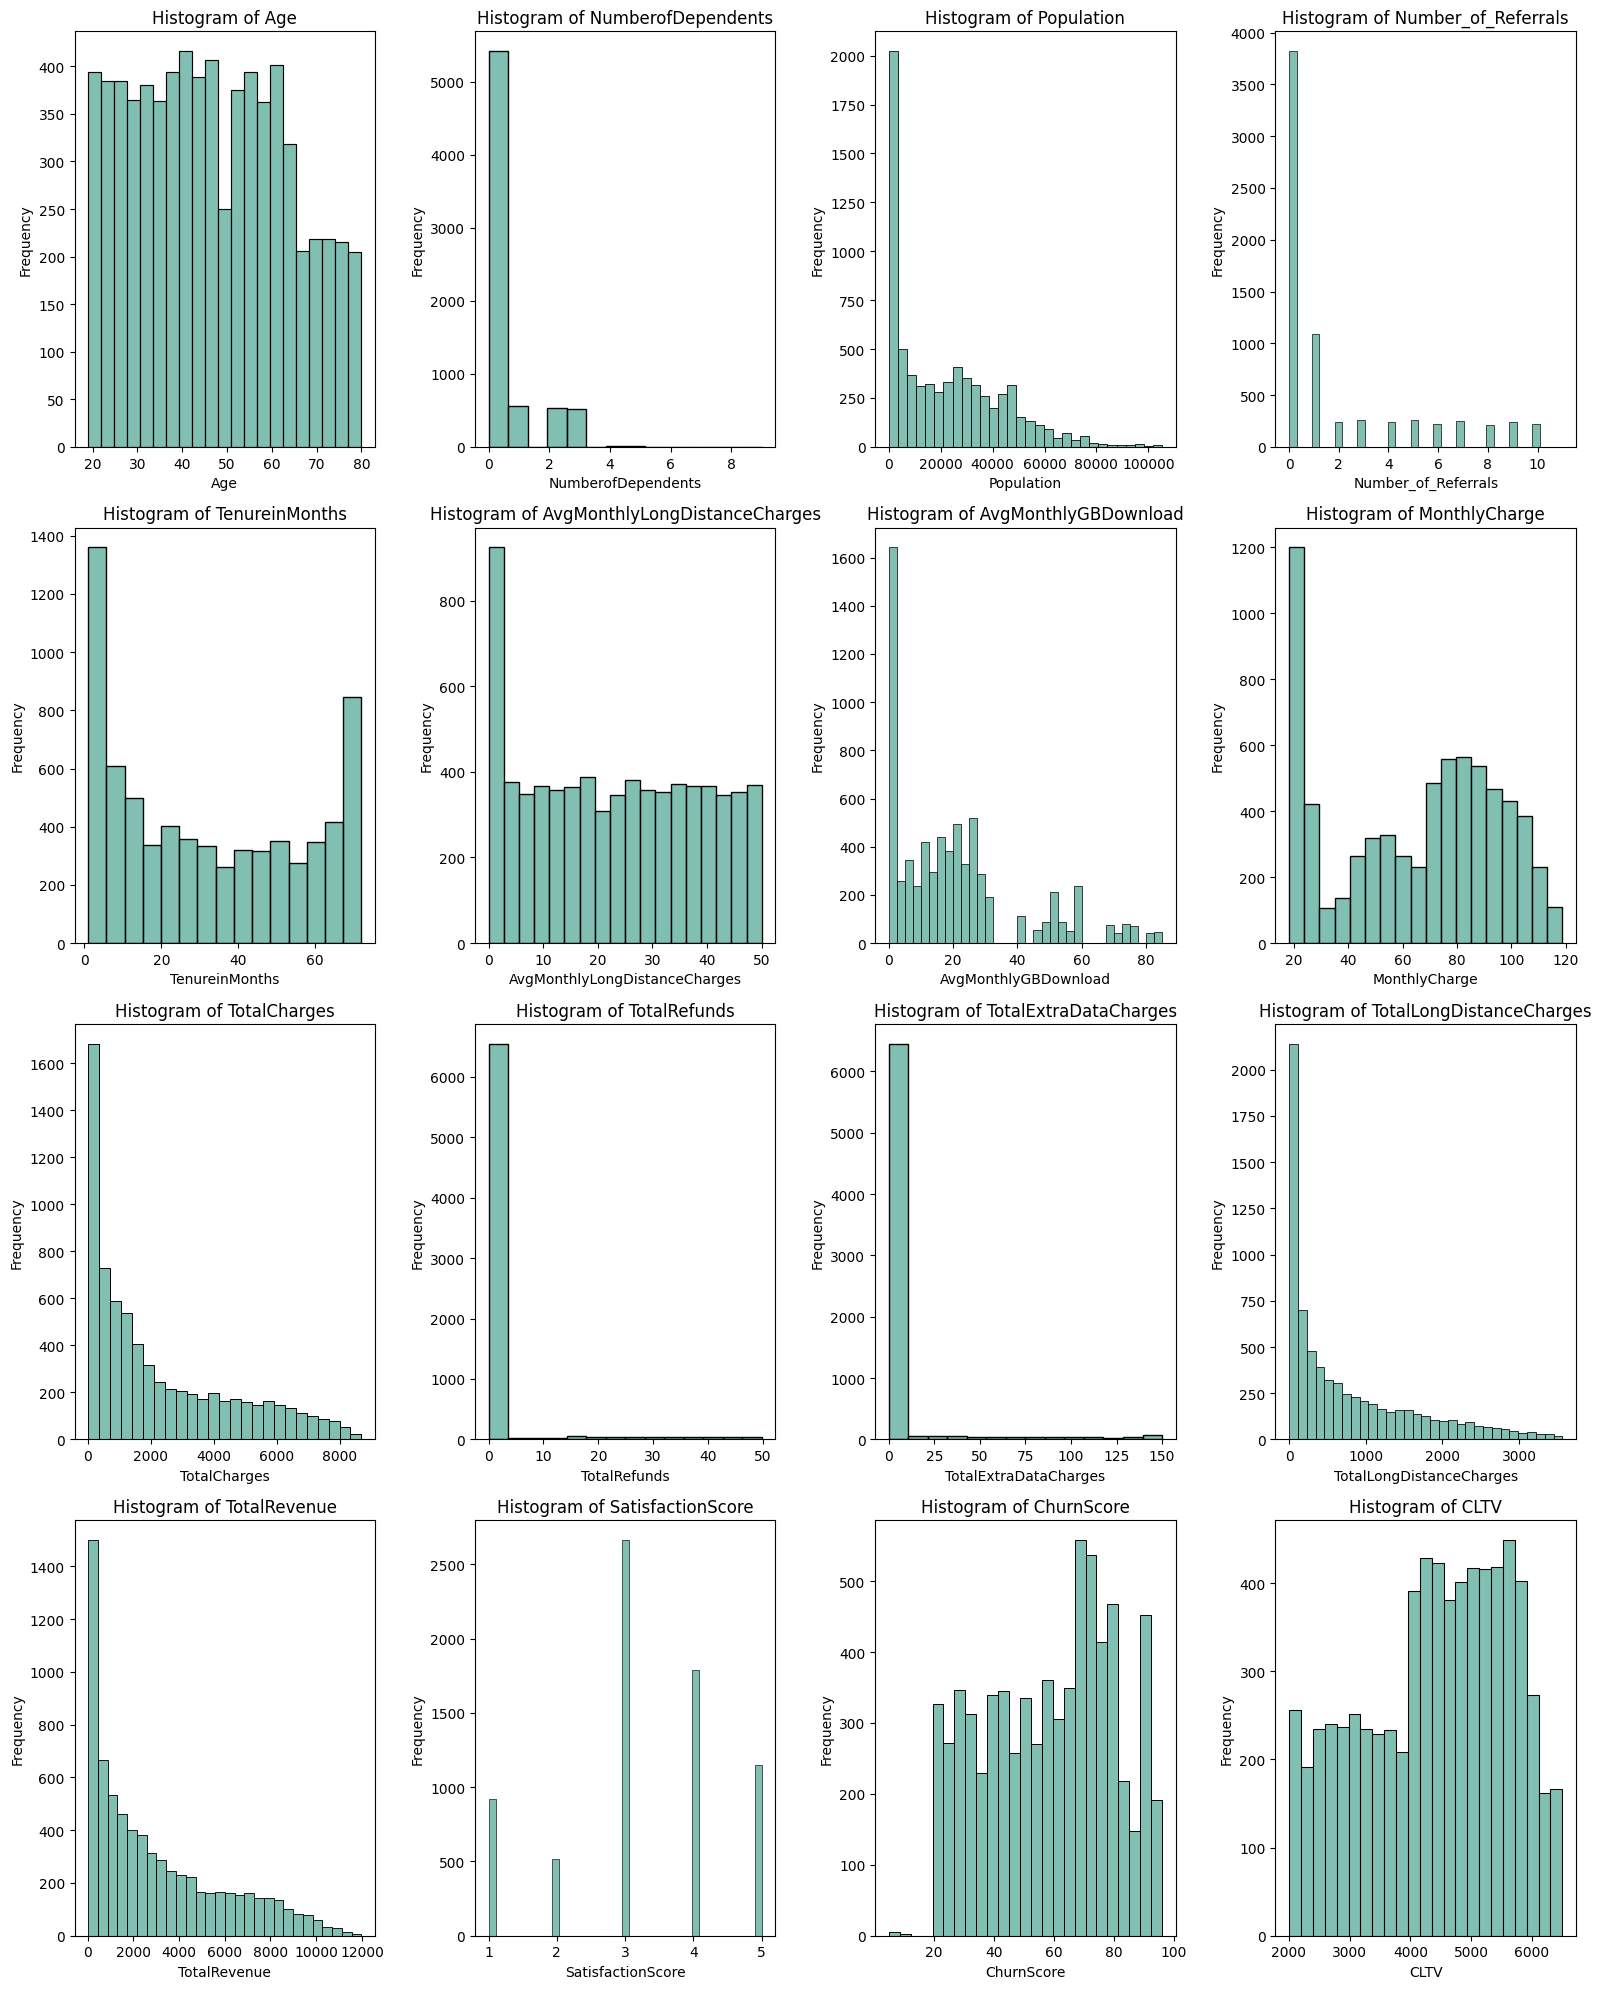

In [ ]:
def plot_histplot(df, color = '#5A9', hue = None):
  num_columns = len(df.columns)
  num_rows = (num_columns + 1) // 4

  fig, axes = plt.subplots(num_rows, 4, figsize = (16, 5 * num_rows))
  axes = axes.flatten()

  for i, column in enumerate(df.columns):
    sns.histplot(data = df, x = column, hue = hue, ax = axes[i], color = color)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {column}')

  for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()
plot_histplot(df[num])

**Illustrating box plot for numeric columns by ChurnLabel**

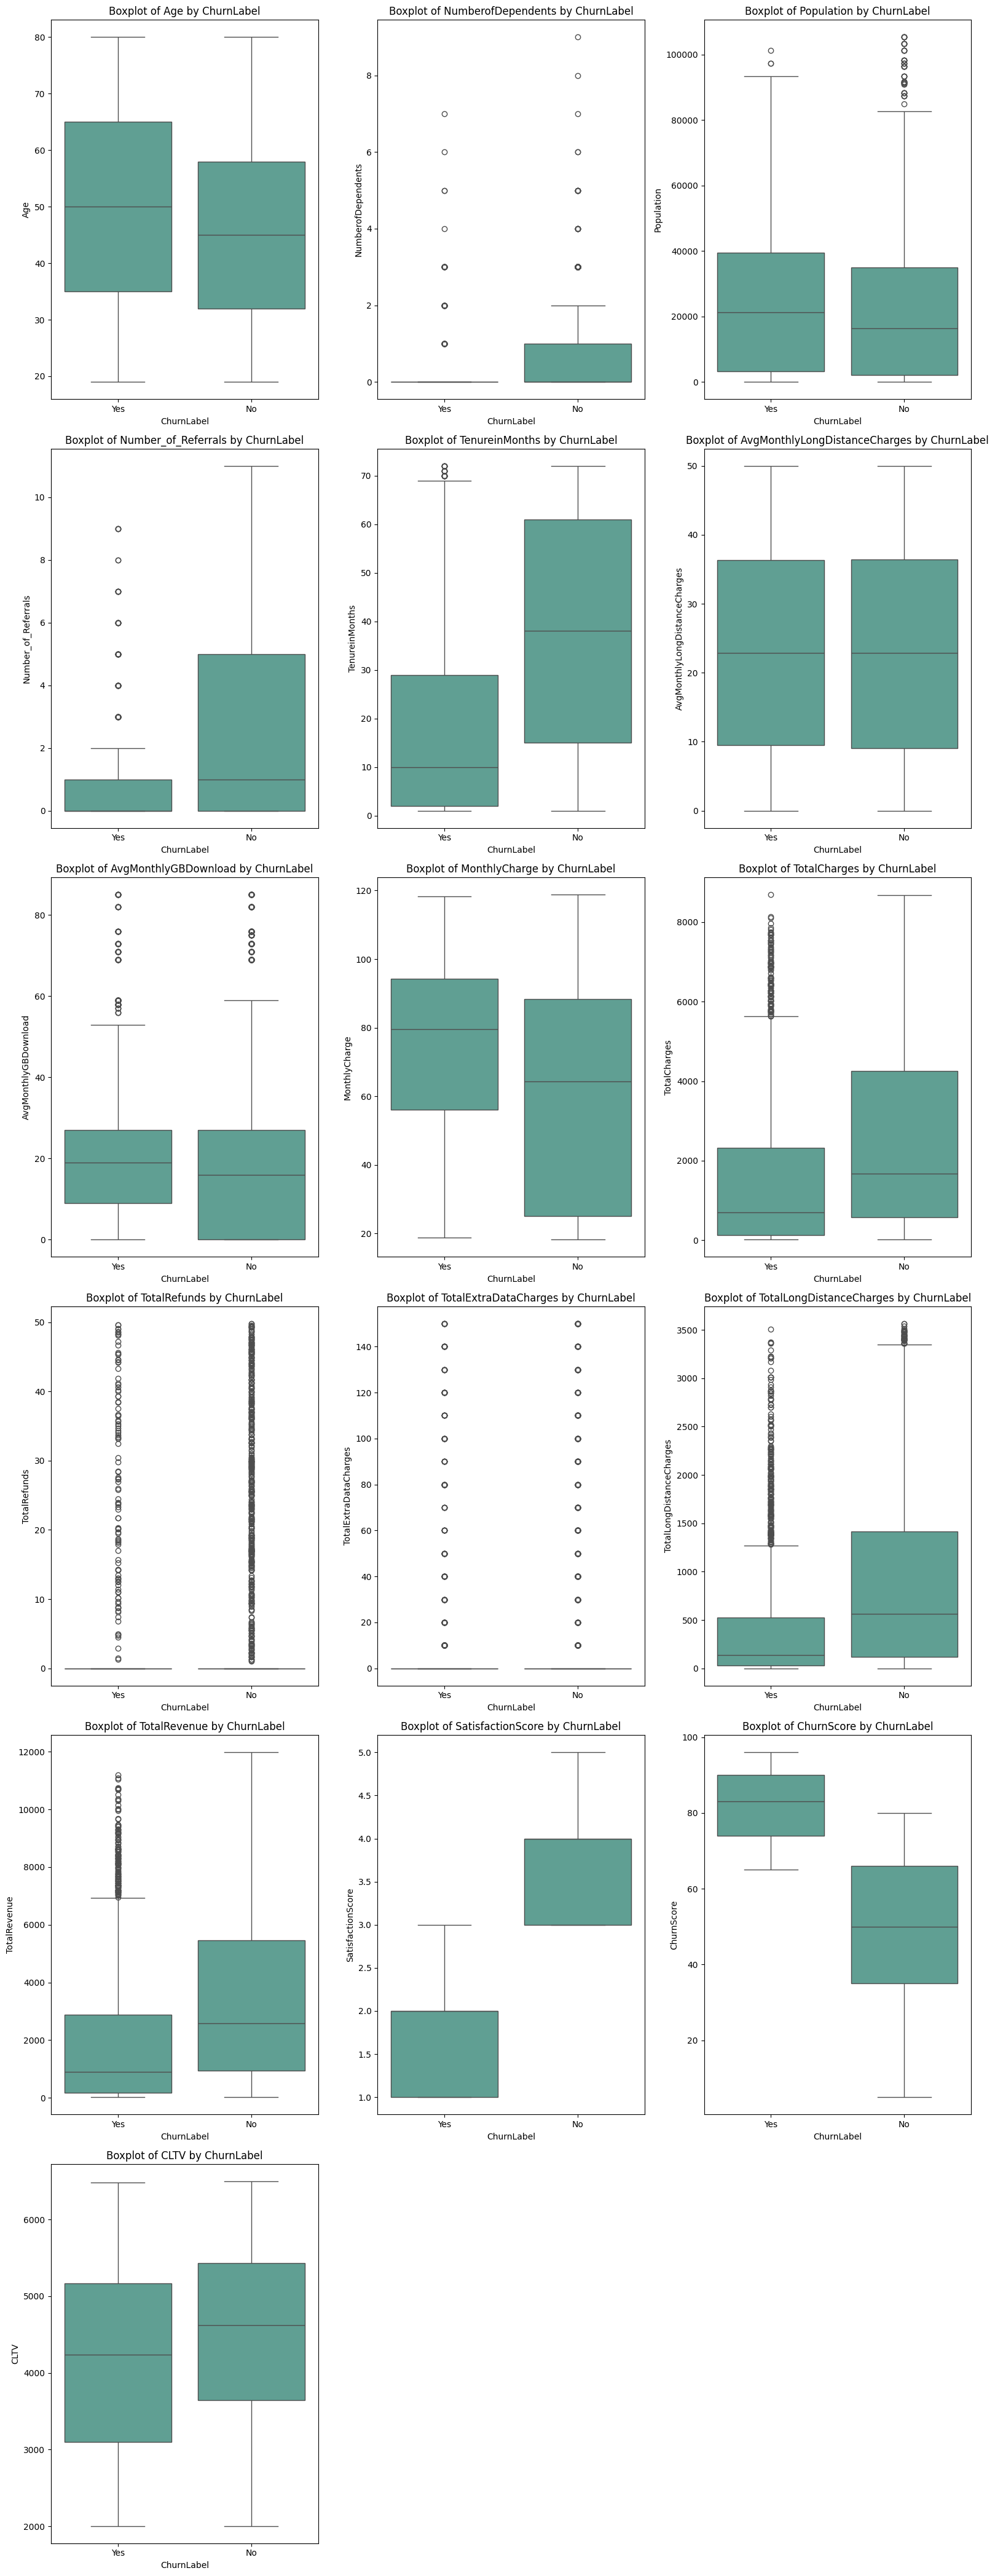

In [ ]:
def plot_boxplot(df, x,  color = '#5A9', hue = None):
  num_columns = len(df.columns)
  num_rows = (num_columns + 1) // 3

  fig, axes = plt.subplots(num_rows, 3, figsize = (16, 7 * num_rows))
  axes = axes.flatten()
  for i, column in enumerate(df.drop(columns = x).columns):
    sns.boxplot(data = df, x = x, y = column, hue = hue, ax = axes[i], color = color)
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(column)
    axes[i].set_title(f'Boxplot of {column} by {x}')

  for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()
plot_boxplot(df[num + ['ChurnLabel']], x = 'ChurnLabel')

According to these boxplots above, we can gain some information:
* Age: churned customers tend to be older than staying customers.
* Number of Referrals: Staying customers tend to have more referrals than churned customers.
* TenureInMonths: churned customers tend to have shorter time using service from the company. While for the stayed customer, the pattern is opposite.
* MonthlyCharge: Churned customers have the interquartile and the median value of monthly charge higher than those of staying customers.
* TotalCharges and TotalRevenue: These two features have the opposite pattern from MonthlyCharge, company gains more revenue from the staying customers. This can be explained by that staying customers stick with the company longer --> Higher TenureInMonths --> Higher TotalCharges and TotalRevenue
* ChurnScore (score that predict the likelihood to churn): Churned customers have higher ChurnScore, obviously.
* SatisfactionScore: churned customer has lower SatisfactionScore, obviously.
* CLTV (Customer Time Value): interquartile of stayed customers approximately distributed in the span of 3600 to 5300, while for the churned customers, interquatile is in the span of approximately 3100 to about 5100.

**Illustrating count plot for categorical features by ChurnLabel**

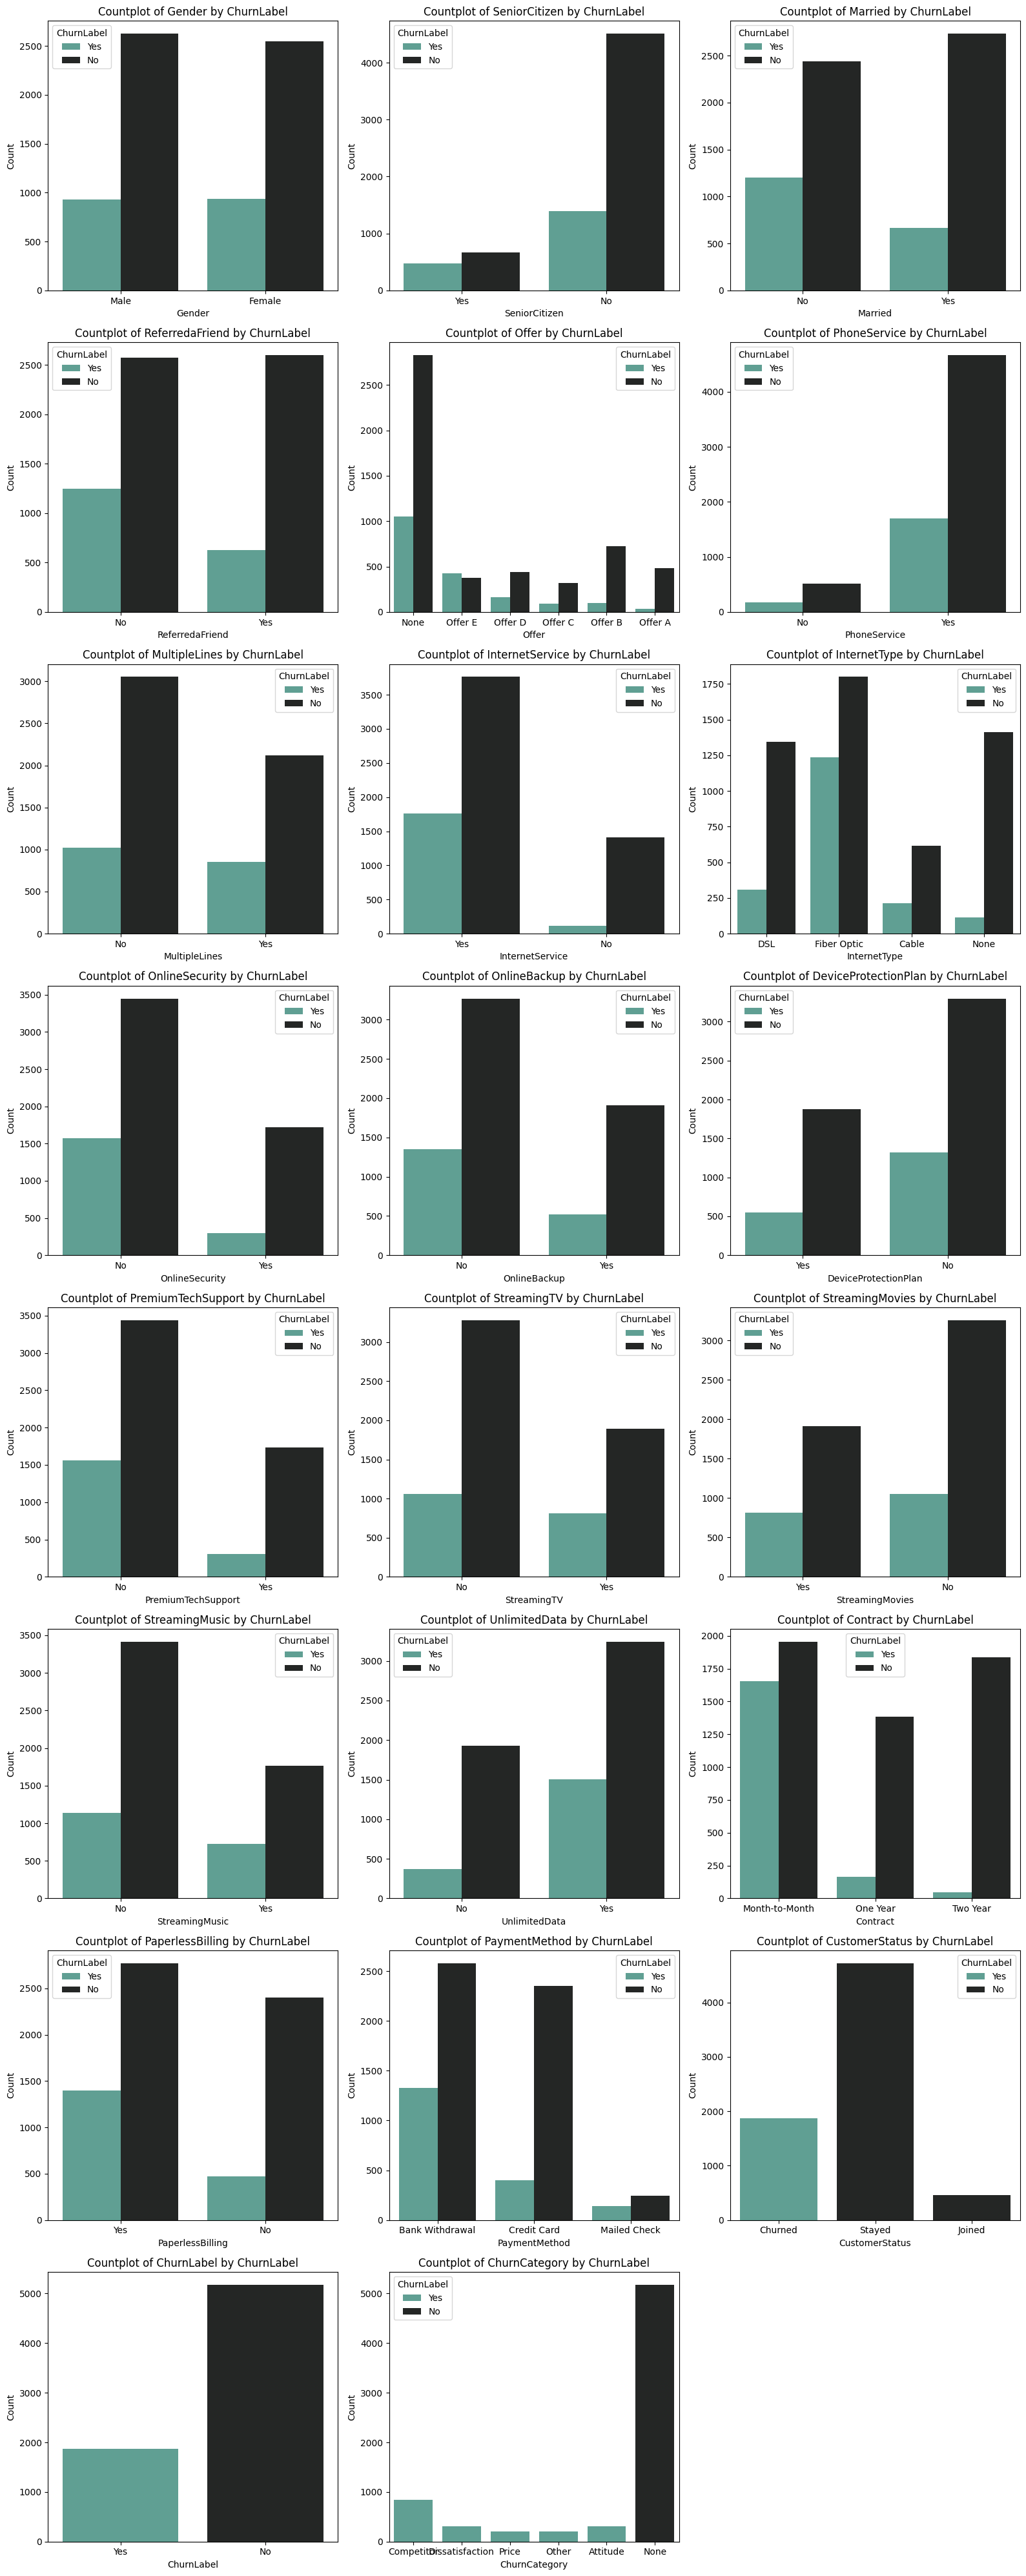

In [ ]:
def plot_countplot(df, palette = 'dark:#5A9_r', hue = None):
  num_columns = len(df.columns)
  num_rows = (num_columns + 1) // 3

  fig, axes = plt.subplots(num_rows, 3, figsize = (16, 5 * num_rows))
  axes = axes.flatten()

  for i, column in enumerate(df.columns):
    ax = sns.countplot(data = df, x = column, hue = hue, ax = axes[i], palette = palette)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Countplot of {column} by {hue}')

  for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()
plot_countplot(df[ob].drop(columns = ['ChurnReason','City']), hue = 'ChurnLabel')


From the multiple plots above, we can gain some insights, which are:
* Contract: most of the churned customers are likely to have month-to-month contract
* Offer:
  * Most customers don't take any offer
  * The number of churned customers who receive Offer E is larger than that of stayed customers. Even for customers who don't receive any offer, the number of staying customers is larger than the number of churned ones.

Note for ML model: Remove Customer Status & Churn Category.


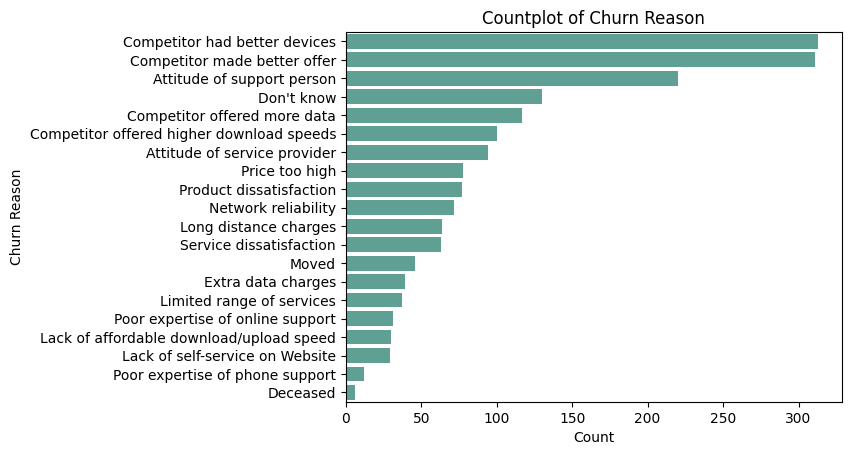

In [ ]:
sns.countplot(data = df[df['ChurnReason'] != 'None'], y = 'ChurnReason', color = '#5A9',
              order = df[df['ChurnReason'] != 'None']['ChurnReason'].value_counts().index)
plt.ylabel('Churn Reason')
plt.xlabel('Count')
plt.title('Countplot of Churn Reason')
plt.show()

According to the Countplot of Churn Reason, we can see that the top 3 reasons which stand out are 'Competitor had better devices', 'Competitor made better offer', and 'Attitude of support person'. <br/>
These numbers emphasize the competitiveness of the competitor, as well as the poor perfomance in customer support service.

In [ ]:
df['City_count'] = df.groupby('City')['City'].transform('count')

In [ ]:
plt.figure(figsize = (20,10))
fig = go.Figure(data = go.Scattergeo(
    lon = df['Longitude'],
    lat = df['Latitude'],
    text = df['City'],
    mode = 'markers',
    marker = dict(
        size = 3,
        opacity = 0.5,
        reversescale = False,
        autocolorscale = False,
        symbol = 'circle',
        line = dict(
            width = 0.3,
            color = 'rgba(102, 102, 102)'
        ),
        colorscale = 'Blues',
        cmin = 0,
        color = df['City_count'],
        cmax = df['City_count'].max(),
        colorbar_title = 'City Count'
    )
))
fig.update_layout(
    title = 'Customer Locations',
    geo_scope = 'usa'
)

fig.show()

<Figure size 2000x1000 with 0 Axes>

**Correlation Matrix**

Previously, we have already known:
* Total Charges ~ Tenure * Monthly Charge
* Total Long Distance Charges = Tenure * AVG Long Distance Charge
* TotalRevenue = TotalCharges - TotalRefunds + TotalExtraDataCharges + TotalLongDistanceCharges
<br/> It is obviously that those columns Total Charges, Total Long Distance Charges, Total Revenue are highly correlated with some other columns in the revenue gained from customers. Therefore, I will omit these features from the correlation matrix and also from the machine learning model to avoid multicollinearity.

<Axes: >

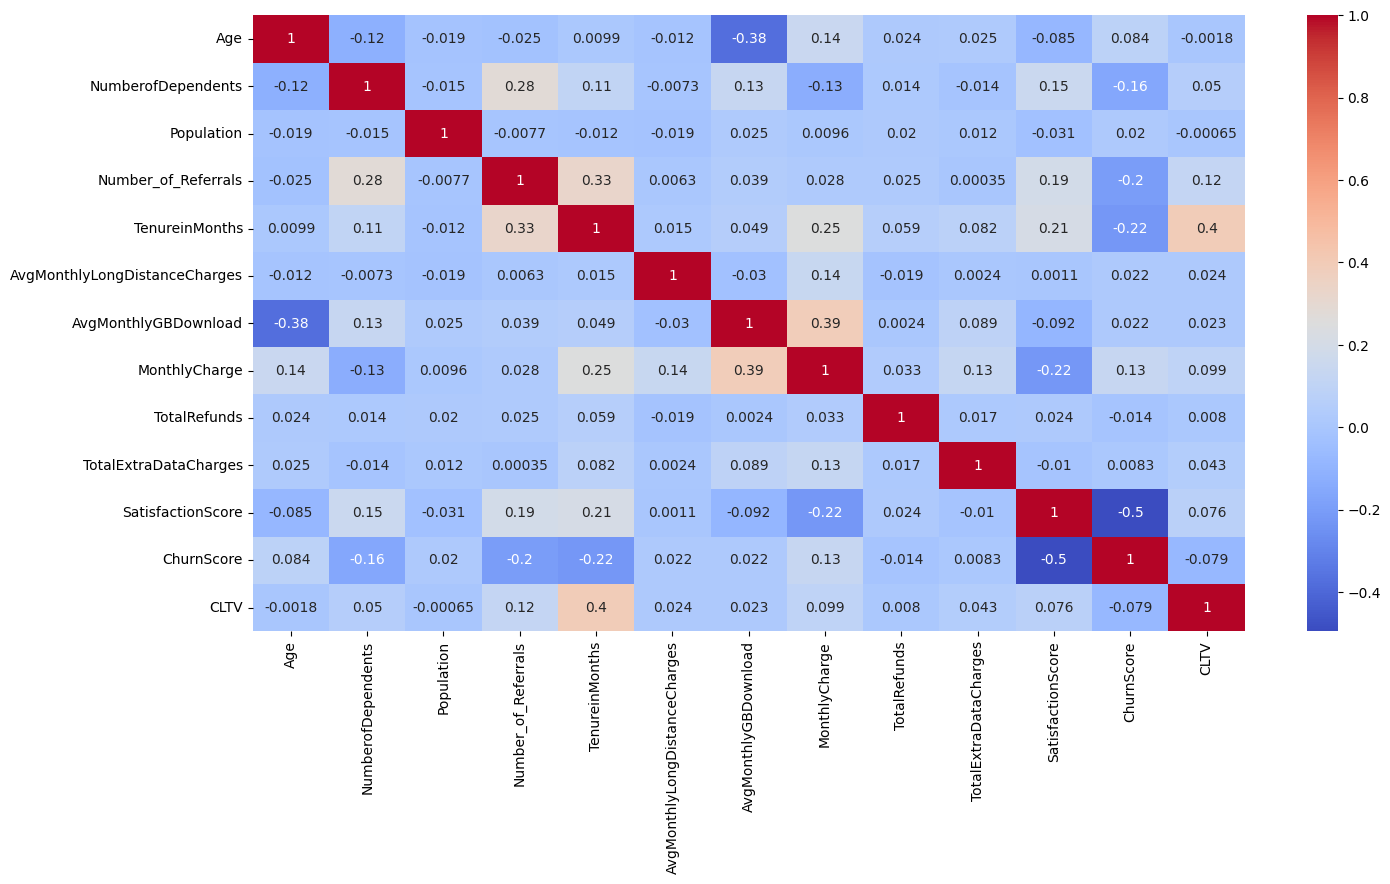

In [ ]:
num.remove('TotalCharges')
num.remove('TotalLongDistanceCharges')
num.remove('TotalRevenue')
correlation = df[num].corr()
plt.figure(figsize = (16, 8))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

Notable correlation:
* Age is negatively correlated with Average Monthly Download
* Number of Referrals is positively correlated with Number of Dependents and Tenure
* Tenure is positive correlated with CLTV
* Average Monthly GB Download is positive correlated with Monthly Charge, obviously
* Monthly Charge is positively correlated with Tenure -> it can indicate that longer lifetime customer tends to pay more
*  Satisfaction Score is positive correlated with Number of Referrals, Tenure and negatively correlated with Monthly Charge
* Churn Score is negatively correlated with Satisfaction Score

**Feature Engineering**

In [ ]:
for col in ob:
  print(f'{col}: {df[col].unique()}')

Gender: ['Male' 'Female']
SeniorCitizen: ['Yes' 'No']
Married: ['No' 'Yes']
City: ['Los Angeles' 'Inglewood' 'Whittier' ... 'Topaz' 'Jacumba' 'Holtville']
ReferredaFriend: ['No' 'Yes']
Offer: ['None' 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['Yes' 'No']
InternetType: ['DSL' 'Fiber Optic' 'Cable' 'None']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['No' 'Yes']
DeviceProtectionPlan: ['Yes' 'No']
PremiumTechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['Yes' 'No']
StreamingMusic: ['No' 'Yes']
UnlimitedData: ['No' 'Yes']
Contract: ['Month-to-Month' 'One Year' 'Two Year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Bank Withdrawal' 'Credit Card' 'Mailed Check']
CustomerStatus: ['Churned' 'Stayed' 'Joined']
ChurnLabel: ['Yes' 'No']
ChurnCategory: ['Competitor' 'Dissatisfaction' 'Price' 'Other' 'Attitude' 'None']
ChurnReason: ['Competitor offered more data' 'Competitor made better offer'
 

* Apply get dummies for features with 'Yes', 'No' columns
* Apply One Hot Encoder for discrete data features having more than 2 values
* Apply Label Encoder for feature with continuous data ('Contract')
* Remove City, ChurnReason, CustomerStatus, and Churn Category

In [ ]:
ob.remove('City')
ob.remove('ChurnReason')
ob.remove('CustomerStatus')
ob.remove('ChurnCategory')
ob_dummies = []
ob_ohe = []
ob_le = []
for col in ob:
  if col == 'Contract':
    ob_le.append(col)
  elif df[col].nunique() > 2:
    ob_ohe.append(col)
  else:
    ob_dummies.append(col)
print(ob_dummies)
print(ob_ohe)
print(ob_le)

['Gender', 'SeniorCitizen', 'Married', 'ReferredaFriend', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtectionPlan', 'PremiumTechSupport', 'StreamingTV', 'StreamingMovies', 'StreamingMusic', 'UnlimitedData', 'PaperlessBilling', 'ChurnLabel']
['Offer', 'InternetType', 'PaymentMethod']
['Contract']


**Applying dummies variables**

In [ ]:
dummies = pd.get_dummies(df[ob_dummies], drop_first = True).astype(int)
for col in dummies.columns:
  if col == 'Gender_Male':
    dummies.rename(columns = {'Gender_Male': 'Gender'}, inplace = True)
  else:
    dummies.rename(columns = {col : col[:-4]}, inplace = True)
dummies.head()

,Gender,SeniorCitizen,Married,ReferredaFriend,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtectionPlan,PremiumTechSupport,StreamingTV,StreamingMovies,StreamingMusic,UnlimitedData,PaperlessBilling,ChurnLabel
0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1
1,0,1,1,1,1,1,1,0,1,0,0,0,0,0,1,1,1
2,1,1,0,0,1,1,1,0,0,0,0,1,1,1,1,1,1
3,0,1,1,1,1,0,1,0,1,1,0,1,1,0,1,1,1
4,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1


**Create a new dataframe consist of One Hot Encoder features**

In [ ]:
ohe = OneHotEncoder(sparse_output = False)
encoded_cols = ohe.fit_transform(df[ob_ohe])
ohe_df = pd.DataFrame(encoded_cols, columns = ohe.get_feature_names_out(ob_ohe))
ohe_df.head()

,Offer_None,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,InternetType_Cable,InternetType_DSL,InternetType_Fiber Optic,InternetType_None,PaymentMethod_Bank Withdrawal,PaymentMethod_Credit Card,PaymentMethod_Mailed Check
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


Label Encode for 'Contract' feature

In [ ]:
df[ob_le]

,Contract
0,Month-to-Month
1,Month-to-Month
2,Month-to-Month
3,Month-to-Month
4,Month-to-Month
...,...
7038,Two Year
7039,One Year
7040,One Year
7041,Month-to-Month


In [ ]:
le = LabelEncoder()
oble = le.fit_transform(df[ob_le])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([0, 0, 0, ..., 1, 0, 2])

**Applying Standard Scaler for numeric features**

In [ ]:
ss = StandardScaler()
scaled_cols = ss.fit_transform(df[num])
scaled_df = pd.DataFrame(scaled_cols, columns = num)
scaled_df.head()

,Age,NumberofDependents,Population,Number_of_Referrals,TenureinMonths,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,MonthlyCharge,TotalRefunds,TotalExtraDataCharges,SatisfactionScore,ChurnScore,CLTV
0,1.880110,-0.486835,2.201392,-0.650409,-1.278988,-1.486303,-0.612975,-0.834611,-0.248313,0.523411,-0.203836,1.535060,0.872974
1,1.641292,0.551874,1.585200,-0.317185,-0.993743,1.676120,-0.172176,0.528063,-0.248313,-0.273300,-0.203836,0.495781,0.762236
2,1.462179,2.629292,1.200630,-0.650409,-0.586250,-0.752828,1.542040,1.019955,5.523605,-0.273300,-1.036080,1.062661,-1.032395
3,1.880110,0.551874,0.266580,-0.317185,-0.301005,-0.207092,-0.417064,1.121324,1.451245,-0.273300,-1.036080,1.393340,0.791822
4,1.999519,0.551874,0.195046,-0.317185,0.187986,-1.076516,-0.319109,0.390134,-0.248313,-0.273300,-1.036080,0.401301,-1.358692


In [ ]:
print(scaled_df.shape)
print(dummies.shape)
print(ohe_df.shape)
print(oble.shape)

(7043, 13)
(7043, 17)
(7043, 13)
(7043,)


In [ ]:
new_df = pd.concat([scaled_df, dummies, ohe_df, pd.Series(oble, name = 'Contract')], axis = 1)
new_df.head()

,Age,NumberofDependents,Population,Number_of_Referrals,TenureinMonths,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,MonthlyCharge,TotalRefunds,TotalExtraDataCharges,SatisfactionScore,ChurnScore,CLTV,Gender,SeniorCitizen,Married,ReferredaFriend,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtectionPlan,PremiumTechSupport,StreamingTV,StreamingMovies,StreamingMusic,UnlimitedData,PaperlessBilling,ChurnLabel,Offer_None,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,InternetType_Cable,InternetType_DSL,InternetType_Fiber Optic,InternetType_None,PaymentMethod_Bank Withdrawal,PaymentMethod_Credit Card,PaymentMethod_Mailed Check,Contract
0,1.880110,-0.486835,2.201392,-0.650409,-1.278988,-1.486303,-0.612975,-0.834611,-0.248313,0.523411,-0.203836,1.535060,0.872974,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
1,1.641292,0.551874,1.585200,-0.317185,-0.993743,1.676120,-0.172176,0.528063,-0.248313,-0.273300,-0.203836,0.495781,0.762236,0,1,1,1,1,1,1,0,1,0,0,0,0,0,1,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
2,1.462179,2.629292,1.200630,-0.650409,-0.586250,-0.752828,1.542040,1.019955,5.523605,-0.273300,-1.036080,1.062661,-1.032395,1,1,0,0,1,1,1,0,0,0,0,1,1,1,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
3,1.880110,0.551874,0.266580,-0.317185,-0.301005,-0.207092,-0.417064,1.121324,1.451245,-0.273300,-1.036080,1.393340,0.791822,0,1,1,1,1,0,1,0,1,1,0,1,1,0,1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
4,1.999519,0.551874,0.195046,-0.317185,0.187986,-1.076516,-0.319109,0.390134,-0.248313,-0.273300,-1.036080,0.401301,-1.358692,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0


**Applying Chi-squared Test for Categorical features**

In [ ]:
X = new_df.drop(columns = num + ['ChurnLabel'])
y = new_df['ChurnLabel']

<Axes: >

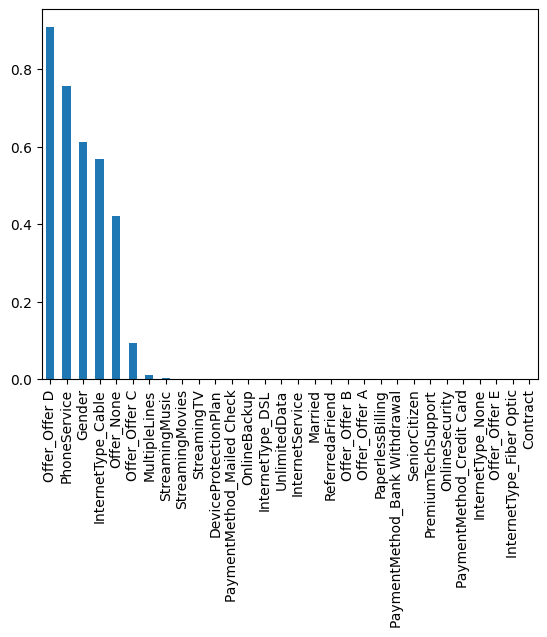

In [ ]:
chi_scores = chi2(X, y)
p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(ascending = False, inplace = True)
p_values.plot.bar()

**Omit features with p_values > 0.05**

In [ ]:
new_df = new_df.drop(columns = p_values[p_values > 0.05].index)
new_df.head()

,Age,NumberofDependents,Population,Number_of_Referrals,TenureinMonths,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,MonthlyCharge,TotalRefunds,TotalExtraDataCharges,SatisfactionScore,ChurnScore,CLTV,SeniorCitizen,Married,ReferredaFriend,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtectionPlan,PremiumTechSupport,StreamingTV,StreamingMovies,StreamingMusic,UnlimitedData,PaperlessBilling,ChurnLabel,Offer_Offer A,Offer_Offer B,Offer_Offer E,InternetType_DSL,InternetType_Fiber Optic,InternetType_None,PaymentMethod_Bank Withdrawal,PaymentMethod_Credit Card,PaymentMethod_Mailed Check,Contract
0,1.880110,-0.486835,2.201392,-0.650409,-1.278988,-1.486303,-0.612975,-0.834611,-0.248313,0.523411,-0.203836,1.535060,0.872974,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
1,1.641292,0.551874,1.585200,-0.317185,-0.993743,1.676120,-0.172176,0.528063,-0.248313,-0.273300,-0.203836,0.495781,0.762236,1,1,1,1,1,0,1,0,0,0,0,0,1,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
2,1.462179,2.629292,1.200630,-0.650409,-0.586250,-0.752828,1.542040,1.019955,5.523605,-0.273300,-1.036080,1.062661,-1.032395,1,0,0,1,1,0,0,0,0,1,1,1,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
3,1.880110,0.551874,0.266580,-0.317185,-0.301005,-0.207092,-0.417064,1.121324,1.451245,-0.273300,-1.036080,1.393340,0.791822,1,1,1,0,1,0,1,1,0,1,1,0,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
4,1.999519,0.551874,0.195046,-0.317185,0.187986,-1.076516,-0.319109,0.390134,-0.248313,-0.273300,-1.036080,0.401301,-1.358692,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0


# **Machine Learning: Classification**

In this case I use ChurnLabel as the Y variable

**Importing libraries for Classification ML**

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

**Balancing the dataset**

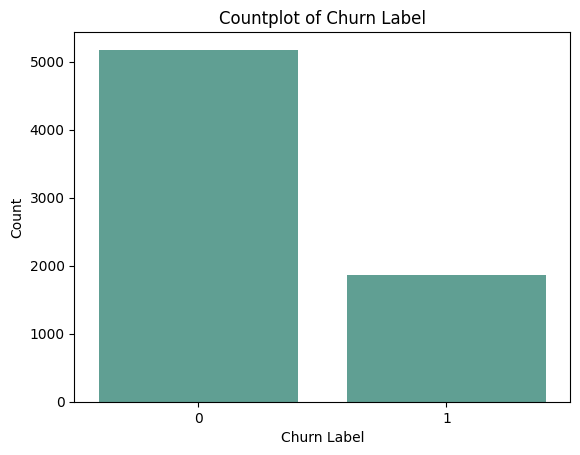

In [ ]:
sns.countplot(data = new_df, x = 'ChurnLabel', color = '#5A9')
plt.ylabel('Count')
plt.xlabel('Churn Label')
plt.title('Countplot of Churn Label')
plt.show()

In [ ]:
x = new_df.drop(columns = 'ChurnLabel')
y = new_df['ChurnLabel']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 37)
(1409, 37)
(5634,)
(1409,)


**Using SMOTE to balance 0 and 1 values of the Y variable**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



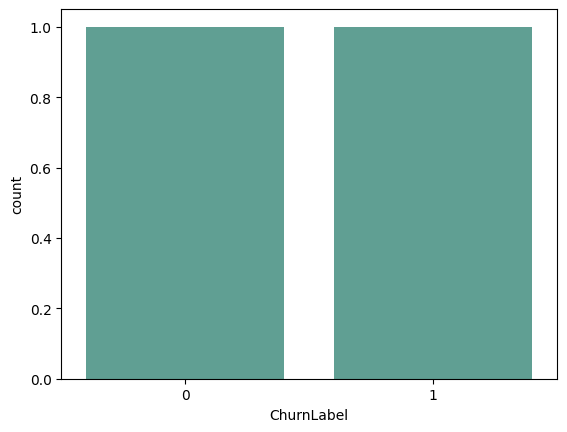

In [ ]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
counter_before = Counter(y)
counter_after = Counter(y_train_resampled)
df_after = pd.DataFrame(counter_after.items(), columns = ['ChurnLabel', 'Count'])
sns.countplot(data = df_after, x = 'ChurnLabel', color = '#5A9')
plt.show()

**Logistic Regression**

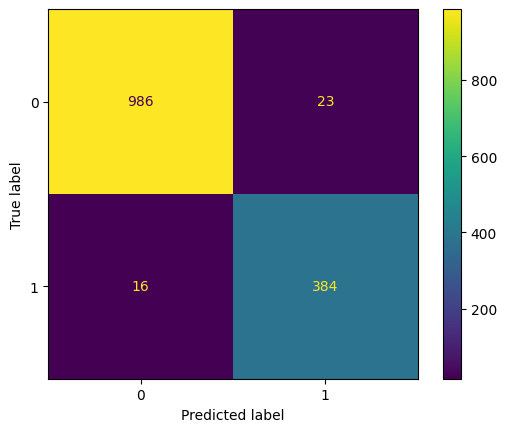

[[986  23]
 [ 16 384]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1009
           1       0.94      0.96      0.95       400

    accuracy                           0.97      1409
   macro avg       0.96      0.97      0.97      1409
weighted avg       0.97      0.97      0.97      1409

Accuracy score: 0.9723207948899929


In [ ]:
lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)
lr_pred = lr.predict(X_test)
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)
plt.show()
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))
print('Accuracy score:', accuracy_score(y_test, lr_pred))

**Decision Tree Classification**

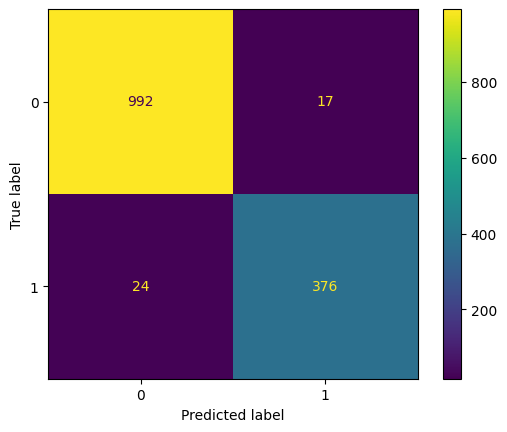

[[992  17]
 [ 24 376]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1009
           1       0.96      0.94      0.95       400

    accuracy                           0.97      1409
   macro avg       0.97      0.96      0.96      1409
weighted avg       0.97      0.97      0.97      1409

Accuracy score: 0.9709013484740951


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_resampled, y_train_resampled)
dt_pred = dt.predict(X_test)
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)
plt.show()
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test,dt_pred))
print('Accuracy score:', accuracy_score(y_test, dt_pred))

In [ ]:
new_df.corr()['ChurnLabel']

,ChurnLabel
Age,0.115760
NumberofDependents,-0.218780
Population,0.051649
Number_of_Referrals,-0.286540
TenureinMonths,-0.352861
AvgMonthlyLongDistanceCharges,0.008120
AvgMonthlyGBDownload,0.048868
MonthlyCharge,0.193356
TotalRefunds,-0.033709
TotalExtraDataCharges,0.007139
